## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.optimize import curve_fit

## 1. Linear Fit

### i. Dataset

In [2]:
np.random.seed(3)

X = np.arange(-30, 30).reshape(-1, 1)
y = 3 * X - 2
y = y + np.random.uniform(-20, 20, size=X.shape)

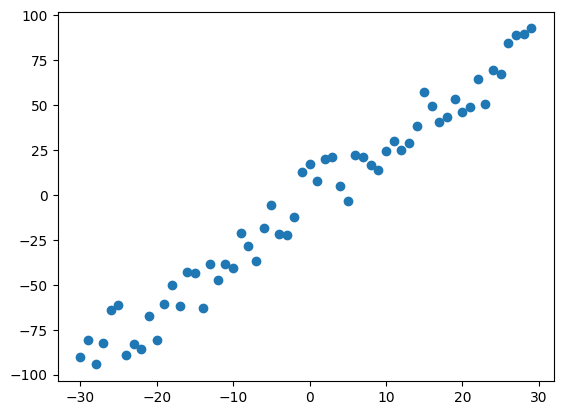

In [3]:
plt.scatter(X, y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=8, shuffle=False)

In [5]:
X_train.flatten(), y_train.flatten(), y_train.shape

(array([-30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18,
        -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,
         -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,
          9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21]),
 array([-89.9680839 , -80.6740871 , -94.36381044, -82.56689579,
        -64.28212183, -61.14827644, -88.97658758, -82.71028487,
        -85.94131187, -67.36760625, -80.80495156, -60.72667102,
        -50.0342381 , -61.86050869, -42.94980392, -43.3654873 ,
        -63.0407247 , -38.64583648, -47.62990212, -38.39595212,
        -40.65899673, -21.27448327, -28.38185129, -36.72529046,
        -18.21403928,  -5.78740942, -21.7454587 , -22.12168464,
        -12.4811497 ,  12.45534599,  17.0398169 ,   7.89534704,
         20.11336434,  20.83003485,   5.11976165,  -3.31131965,
         22.1364361 ,  21.3136305 ,  16.46259052,  14.00218019,
         24.26079666,  29.75760995,  24.76942313,  28.67171097,
  

In [6]:
X_test.flatten(), y_test.flatten(), y_test.shape

(array([22, 23, 24, 25, 26, 27, 28, 29]),
 array([64.56140239, 50.48917475, 69.34342129, 67.4870485 , 84.30746487,
        88.86984892, 89.64371687, 92.56721655]),
 (8, 1))

### ii. Model

In [7]:
m = LinearRegression()
m.fit(X_train, y_train)

LinearRegression()

In [8]:
print("slope:", m.coef_)
print("intercept:", m.intercept_)

slope: [[2.96799936]]
intercept: [-3.84078726]


### iii. Predict

In [9]:
y_pred = m.predict(X_test)
y_pred

array([[61.45519866],
       [64.42319802],
       [67.39119738],
       [70.35919674],
       [73.3271961 ],
       [76.29519546],
       [79.26319482],
       [82.23119418]])

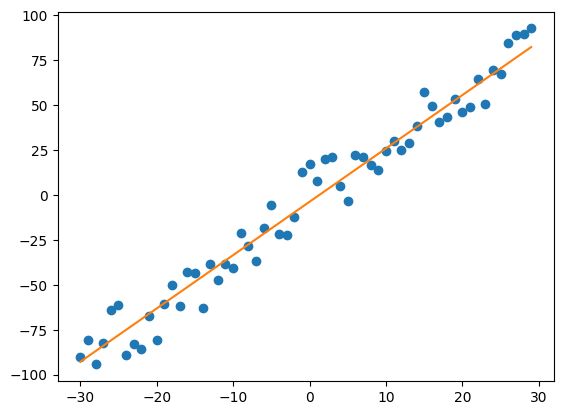

In [10]:
# Fitting on whole data
plt.plot(X, y, 'o')
plt.plot(X, m.coef_ * X + m.intercept_)

### iv. Evalute

In [12]:
mean_absolute_error(y_test, y_pred) ,mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(8.26700822627712, 88.64284103244196, 0.5550136423436166)

## 2. Parabolic Fit

### i. Dataset

In [15]:
np.random.seed(3)

X = np.arange(-30, 30).astype(np.int32)
y = 0.5 * X ** 2 - 3 * X - 5
y = y + np.random.uniform(-50, 50, size=X.shape)

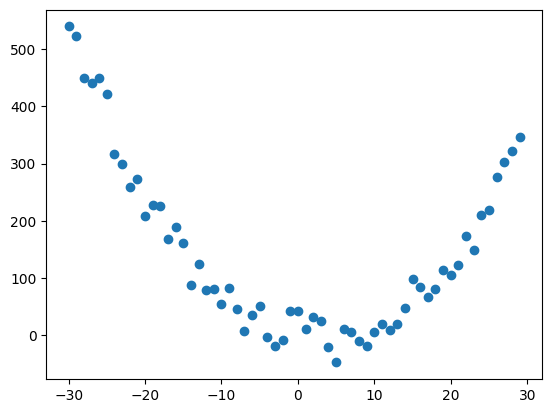

In [16]:
plt.scatter(X, y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=8, shuffle=False)

In [18]:
X_train, y_train, y_train.shape

(array([-30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18,
        -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,
         -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,
          9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21],
       dtype=int32),
 array([540.07979026, 523.31478226, 450.09047389, 441.58276052,
        450.29469543, 422.12930889, 317.55853105, 299.22428781,
        258.14672033, 272.58098437, 207.98762109, 228.18332244,
        225.91440476, 168.34872826, 188.6254902 , 161.58628174,
         87.39818824, 124.3854088 ,  78.92524469,  80.0101197 ,
         53.35250818,  81.81379183,  45.04537177,   6.18677385,
         35.4649018 ,  50.53147645,  -4.36364676, -19.30421161,
         -8.20287424,  42.13836499,  42.59954225,   9.73836759,
         31.28341085,  25.07508713, -21.20059587, -48.27829911,
         10.34109025,   4.28407624, -10.84352369, -18.99454952,
          5.65199164,  19.39402487,   7.923557

In [19]:
X_test, y_test, y_test.shape

(array([22, 23, 24, 25, 26, 27, 28, 29], dtype=int32),
 array([172.40350598, 149.22293688, 209.35855324, 218.71762124,
        275.76866218, 303.17462231, 322.10929219, 347.41804138]),
 (8,))

### ii. Model

In [21]:
coefficients = np.polyfit(X_train, y_train, 2)
a, b, c = coefficients

print("For ax^2 + bx + c coefficients are:", coefficients, "respectively.")

For ax^2 + bx + c coefficients are: [ 0.48571295 -3.20858509 -6.67312192] respectively.


### iii. Predict

In [22]:
def parabola(x):
    return a * x**2 + b * x + c

y_pred = parabola(X_test)
y_pred

array([157.82307152, 176.47156897, 196.0914923 , 216.68284152,
       238.24561663, 260.77981764, 284.28544453, 308.76249732])

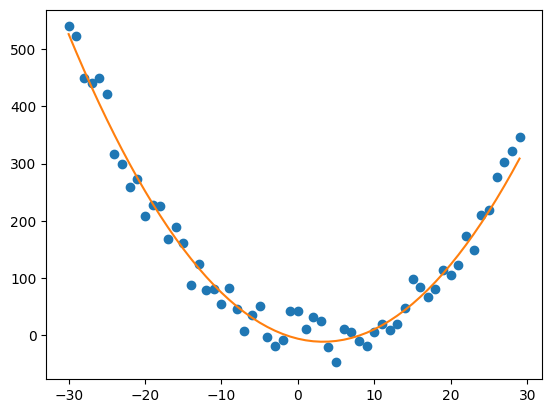

In [23]:
# Fitting on whole data
plt.plot(X, y, 'o')
plt.plot(X, parabola(X))

### iv. Evaluate

In [24]:
mean_absolute_error(y_test, y_pred)

26.69101864191907